<a href="https://colab.research.google.com/github/Gonzalez-Matias/Anyone-sprint1/blob/main/AnyoneAI_Sprint1_Project1(Enzo_Matias_Gonzalez)v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AnyoneAI - Project I

# An analysis of NBA players in the 2021/2022 season

Hi! this is the first of several projects we're going to be working on during this course. 
You will be expected to finish this on your own, but you can use the available channels on Discord to ask questions and help others. Please read the entire notebook before starting, this will give you a better idea of what you need to accomplish.

This project will rely heavily in the use of API as data sources. Contrary to most machine learning challenges and competitions, working in the industry usually requires the ML Developer to work with multiple teams and use heterogeneous sources of information to get the necessary data to solve a particular problem. Access to data is often provided through application programming interfaces (APIs), whether internal or external to the organization. It is very important to understand how to interact with APIs to collect data in our day to day work.

You might be wondering: why basketball? The main reason is availability of data.

The sport is played at a fast pace, with hundreds of plays in each single game, thousands of games in a season, and with a relatively small amount of on-court players, which gives them a lot of interactions with the ball, which in turn provides an oportunity to collect a great amount of data about each player performance.

These are the objectives of the project:
- Understanding how to query an API to create a dataset with Python and Pandas
- Learning how to cleanup a dataset and generate new fields from calculated data
- Storing the created dataset in a serialized manner
- Generating statistics about the data
- Visualizing data

## Introduction

### A brief description of basketball and the NBA

The National Basketball Association is the main basketball league in the United States of America. It currently features 30 teams from different cities, divided in 2 conferences (East and West) of 15 teams. Each team plays a total of 82 games during the regular season. After that, the 8 teams with better records from each conference are seeded in a playoff format, with the winner of each conference playing the finals to determine the eventual champion. NBA seasons usually play out between october of one year, to june of the next year, so for example the current season being played is called the 2021/2022 season.

As in most leagues in the world, the game is played 5 vs 5 players, with as many as 9 reserve players that can rotate with the starters as many times as the team wants. Games are played to 48 minutes, so the total amount of minutes of combined play time for any team in a single game with no added time is 240 minutes. If the score is tied at the end of the 48 minutes, 5 minutes of extra time are played, this continues until a winner is decided.

Even though they can play multiple positions, players are usually classified according to the following positions:

- Guards
    - Point Guards
    - Shooting Guards
- Forwards
    - Small Forwards
    - Power Forwards
- Centers

We will mainly focus on the three main positions: Guards/Forwards/Centers

### The dataset

You'll be in charge of creating our dataset. We want to create a single pandas dataframe with information about all active players in the current NBA season. 
The dataset needs to have the following structure:

- Personal Information
    - player_id (int) (INDEX) 
    - player_name (str)
    - team_name (str)
    - position (str)
    - height (int) (in centimeters) 
    - weight (float) (in kilograms)
    - country of origin (str)
    - date_of_birth (datetime)
    - age (str) (years and months)
    - years_of_experience (int) (years since entering the league)
    - Draft position (int)
- Player career statistics
    - games played (int)
    - minutes per game (float)
    - points per game (float)
    - rebounds per game (float)
    - assists per game (float)
    - steals per game (float)
    - blocks per game (float)
- Misc
    - salary in dollars (int) (contract value for this season only)
    - next_game_date (datetime)

Here is a sample of how the final result should look like:

In [ ]:
import pandas as pd

sample_dict = {
    'PLAYER_NAME': {200765: 'Rajon Rondo',  203107: 'Tomas Satoransky',  204060: 'Joe Ingles'},
    'TEAM_NAME': {200765: 'Cavaliers', 203107: 'Wizards', 204060: 'Trail Blazers'},
    'POSITION': {200765: 'Guard', 203107: 'Guard', 204060: 'Forward'},
    'HEIGHT': {200765: 185, 203107: 201, 204060: 203},
    'WEIGHT': {200765: 82, 203107: 95, 204060: 100},
    'COUNTRY': {200765: 'USA', 203107: 'Czech Republic', 204060: 'Australia'},
    'BIRTHDATE': {200765: pd.Timestamp('1986-02-22 00:00:00'), 203107: pd.Timestamp('1991-10-30 00:00:00'), 204060: pd.Timestamp('1987-10-02 00:00:00')},
    'SEASON_EXP': {200765: 15, 203107: 5, 204060: 7},
    'DRAFT_NUMBER': {200765: '21', 203107: '32', 204060: 'Undrafted'},
    'GP': {200765: 957, 203107: 388, 204060: 590},
    'MIN': {200765: 29.9, 203107: 22.2, 204060: 25.7},
    'PTS': {200765: 9.8, 203107: 6.9, 204060: 8.6},
    'REB': {200765: 4.5, 203107: 2.9, 204060: 3.2},
    'AST': {200765: 7.9, 203107: 4.1, 204060: 3.8},
    'STL': {200765: 1.6, 203107: 0.8, 204060: 0.9},
    'BLK': {200765: 0.1, 203107: 0.2, 204060: 0.2},
    'GAME_DATE': {200765: pd.Timestamp('2022-04-10 00:00:00'), 203107: pd.Timestamp('2022-04-10 00:00:00'), 204060: pd.Timestamp('2022-04-10 00:00:00')},
    'SALARY': {200765: 2641691, 203107: 10468119, 204060: 14000000},
    'AGE': {200765: '36 years, 1 months, 19 days', 203107: '30 years, 5 months, 11 days', 204060: '34 years, 6 months, 8 days'}
}
pd.DataFrame(sample_dict)

,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,GAME_DATE,SALARY,AGE
200765,Rajon Rondo,Cavaliers,Guard,185,82,USA,1986-02-22,15,21,957,29.9,9.8,4.5,7.9,1.6,0.1,2022-04-10,2641691,"36 years, 1 months, 19 days"
203107,Tomas Satoransky,Wizards,Guard,201,95,Czech Republic,1991-10-30,5,32,388,22.2,6.9,2.9,4.1,0.8,0.2,2022-04-10,10468119,"30 years, 5 months, 11 days"
204060,Joe Ingles,Trail Blazers,Forward,203,100,Australia,1987-10-02,7,Undrafted,590,25.7,8.6,3.2,3.8,0.9,0.2,2022-04-10,14000000,"34 years, 6 months, 8 days"


## Collecting information for building our dataset

In this section, we're only going to work on collecting the necessary raw data to build the required dataset. Don't worry about finishing everything here, we'll generate the appropiate fields and merge the data into a single dataframe in the next section.

To get the information, you can use any public and free API you can find, but you have to provide the code that gets the information here. We recommend using this API:
 
- https://github.com/swar/nba_api

    This is a Python library that can be used to obtain data from stats.nba.com, it provides a set of methods that abstracts you from making the http calls, but directly makes calls to nba stats page and parses the results. [Here](https://github.com/swar/nba_api/blob/master/docs/examples/Basics.ipynb) are a couple of examples on how to use it.
    

A few notes on data collection:

- Start simple. Try to get all the required information for 1 player, read the APIs documentation carefuly, then think about how to use them to collect all players data. 

- Please bear in mind that the most public APIs have some kind of rate limit, so you have to be careful about iterating on data and making lots of requests in a short amount of time (a 1 second delay between calls to the api should be enough). Once you've collected what you needed, save it to file in order to retrieve it later without calling the API again.

- A key consideration: we only want data about players that have played in the current season, so make sure to filter those out before collecting the rest of the information.

- There is at least one piece of information you're not going to find in both of those APIs: the player contract information. Again you can decide to use any source, but we recommend using information provided [here](https://www.basketball-reference.com/contracts/players.html), as it lets you export the data as a csv.  

In [ ]:
!pip install nba_api
!pip install geopandas

     |████████████████████████████████| 1.0 MB 26.0 MB/s 
     |████████████████████████████████| 16.7 MB 50.5 MB/s 
     |████████████████████████████████| 6.3 MB 43.9 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import time
import unicodedata
from datetime import date
from collections import Counter
import difflib
from IPython.display import clear_output
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from matplotlib import pyplot
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.cm import coolwarm
import geopandas as gdp
from nba_api.stats.endpoints import playercareerstats , commonplayerinfo, playerprofilev2, commonallplayers
sns.set_style("whitegrid")

1- Create a function to find all ACTIVE players, meaning players that are listed with a team in the 2021/2022 season. For now you only need the player id, name, and team. Save the dataframe to a csv named "nba_current_players_list.csv". The function should return the dataframe.

Hint: you should find an API method that can give you a list of players in just one call, this way we can filter those players we're interested in, and later will make calls for each specific player.

Consider dropping: 
- All players with TEAM_ID == 0
- All players with GAMES_PLAYED_FLAG == N
- Player with id 1630597 (This guy is a problem ;))

In [ ]:
### Complete in this cell: get all active players from the api

def get_and_save_players_list():
  plays = commonallplayers.CommonAllPlayers(is_only_current_season=1).get_data_frames()[0]
  marks = (plays.TEAM_ID == 0) | (plays.GAMES_PLAYED_FLAG == "N") | (plays.PERSON_ID == 1630597)
  current_players_list = plays.drop(plays.loc[marks].index,  axis=0)["PERSON_ID"]
  return current_players_list

In [ ]:
current_players_list = get_and_save_players_list()
current_players_list.to_csv("nba_current_players_list.csv")
current_players_list

0      1630173
1       203500
2      1628389
3      1630583
4       200746
        ...   
612    1628221
613     201152
614    1629027
615    1630209
617    1627826
Name: PERSON_ID, Length: 503, dtype: int64

2- Create a function to find the personal information of all players listed in the dataframe created in the previous step, and save it to a csv file named "nba_players_personal_info.csv". The function should also return the created dataframe.

OPTIONAL: iterating on a list of players and making API calls can be complex and full of errors, try a code block that handles exceptions (for example a timeout from the API) and returns the partial result before it failed, you could also save the partial information to disk.

In [ ]:
### Complete in this cell: Find players personal information (name, age, dob, etc), store the information in a CSV file.

def get_players_personal_information(current_players_list):
  basic_info_player = []
  for id in current_players_list:
    career = commonplayerinfo.CommonPlayerInfo(player_id = id,proxy='63.161.104.189:3128', timeout=100)
    basic_info_player.append(career)
    clear_output(wait=True)
    print(str(round(len(basic_info_player)/len(current_players_list)*100,2)) + "%")
    time.sleep(0.5)
  basic_data_players = basic_info_player[0].get_data_frames()[0]
  for player in range(1,len(basic_info_player)):
    basic_data_players = pd.concat([basic_data_players,basic_info_player[player].get_data_frames()[0]], ignore_index=True )         
  basic_data_players.drop_duplicates(inplace=True)
  mask = (basic_data_players.TEAM_ID == 0) | (basic_data_players.GAMES_PLAYED_FLAG == "N") | (basic_data_players.PERSON_ID == 1630597)
  dropeable_index =basic_data_players.loc[mask].index 
  basic_data_players.drop(dropeable_index, axis=0, inplace = True)
  basic_data_players = basic_data_players[["PERSON_ID", "DISPLAY_FIRST_LAST", "TEAM_NAME", "POSITION", "HEIGHT", "WEIGHT", "COUNTRY", "BIRTHDATE", "SEASON_EXP", "DRAFT_NUMBER"]]
  basic_data_players.set_index(basic_data_players.PERSON_ID, inplace=True)
  basic_data_players.drop(["PERSON_ID"], axis=1, inplace=True)
  basic_data_players.index.name = None
  return basic_data_players

In [ ]:
players_personal_info = get_players_personal_information(current_players_list)
players_personal_info.to_csv("players_personal_info.csv")

100.0%


In [ ]:
players_personal_info.head()

,DISPLAY_FIRST_LAST,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER
1630173,Precious Achiuwa,Raptors,Forward,6-8,225,Nigeria,1999-09-19T00:00:00,1,20
203500,Steven Adams,Grizzlies,Center,6-11,265,New Zealand,1993-07-20T00:00:00,8,12
1628389,Bam Adebayo,Heat,Center-Forward,6-9,255,USA,1997-07-18T00:00:00,4,14
1630583,Santi Aldama,Grizzlies,Forward-Center,6-11,215,Spain,2001-01-10T00:00:00,0,30
200746,LaMarcus Aldridge,Nets,Center-Forward,6-11,250,USA,1985-07-19T00:00:00,15,2


In [ ]:
players_personal_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 503 entries, 1630173 to 1627826
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   DISPLAY_FIRST_LAST  503 non-null    object
 1   TEAM_NAME           503 non-null    object
 2   POSITION            503 non-null    object
 3   HEIGHT              503 non-null    object
 4   WEIGHT              503 non-null    object
 5   COUNTRY             503 non-null    object
 6   BIRTHDATE           503 non-null    object
 7   SEASON_EXP          503 non-null    int64 
 8   DRAFT_NUMBER        497 non-null    object
dtypes: int64(1), object(8)
memory usage: 39.3+ KB


3- Create a function to find players career statistics, store the information in a CSV file called "nba_players_career_stats.csv"

In [ ]:
### Complete in this cell: find players career stats, save to csv file

def get_players_career_stats(current_players_list):
  info_player = []
  for id in current_players_list:
    career = playercareerstats.PlayerCareerStats(per_mode36="PerGame", player_id = id,proxy='63.161.104.189:3128', timeout=100).career_totals_regular_season
    info_player.append(career)
    clear_output(wait=True)
    print(str(round(len(info_player)/len(current_players_list)*100,2)) + "%")
    time.sleep(0.2)
  data_players_stats = info_player[0].get_data_frame()
  data_players_stats = data_players_stats[["PLAYER_ID", "GP", "MIN", "PTS", "REB", "AST", "STL", "BLK"]] 
  for player in range(1,len(info_player)):
    data = info_player[player].get_data_frame()
    data = data[["PLAYER_ID", "GP", "MIN", "PTS", "REB", "AST", "STL", "BLK"]]  
    data_players_stats = pd.concat([data_players_stats, data ], ignore_index=True)
  data_players_stats.drop_duplicates(inplace=True, subset = ["PLAYER_ID"], keep = "first")
  data_players_stats.set_index(data_players_stats.PLAYER_ID, inplace=True)
  data_players_stats.drop(["PLAYER_ID"], axis=1, inplace=True)
  data_players_stats.index.name = None
  return data_players_stats

In [ ]:
players_career_stats = get_players_career_stats(current_players_list)
players_career_stats.to_csv("players_career_stats.csv")

100.0%


In [ ]:
players_career_stats.head()

,GP,MIN,PTS,REB,AST,STL,BLK
1630173,134,18.4,7.2,5.1,0.8,0.4,0.5
203500,664,26.8,9.3,8.0,1.5,0.9,0.9
1628389,343,28.2,13.5,8.3,3.5,1.0,0.9
1630583,32,11.2,4.1,2.7,0.7,0.2,0.3
200746,1076,33.7,19.1,8.1,1.9,0.7,1.1


In [ ]:
players_career_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 503 entries, 1630173 to 1627826
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GP      503 non-null    int64  
 1   MIN     503 non-null    float64
 2   PTS     503 non-null    float64
 3   REB     503 non-null    float64
 4   AST     503 non-null    float64
 5   STL     503 non-null    float64
 6   BLK     503 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 31.4 KB


4- Create a function to find players next games and save the information to a csv call "nba_players_next_game.csv"

In [ ]:
### Complete in this cell: find players next game
###REVISAR
def get_players_next_game(current_players_list):
  players_next_game = []
  data_teams_final =  pd.DataFrame(current_players_list)
  data_teams_final.columns = ["PLAYER_ID"]
  data_teams_final.index = list(range(0,len(current_players_list)))
  for id in current_players_list:
    next_game = playerprofilev2.PlayerProfileV2(player_id= id,proxy='63.161.104.189:3128', timeout=100).next_game
    players_next_game.append(next_game)
    clear_output(wait=True)
    print(str(round(len(players_next_game)/len(current_players_list)*100,2)) + "%")
    time.sleep(0.3)
  data_teams = players_next_game[0].get_data_frame()
  for team_n in range(1,len(players_next_game)):
    data_teams = pd.concat([data_teams,players_next_game[team_n].get_data_frame()], ignore_index=True)
  data_teams_final["GAME_DATE"] = data_teams["GAME_DATE"]
  data_teams_final.set_index(data_teams_final.PLAYER_ID, inplace=True)
  data_teams_final.drop(["PLAYER_ID"], axis=1, inplace=True)
  data_teams_final.index.name = None
  return data_teams_final

In [ ]:
players_next_game = get_players_next_game(current_players_list)
players_next_game.to_csv("players_next_game.csv")

100.0%


In [ ]:
players_next_game.head()

,GAME_DATE
1630173,APR 18 2022
203500,APR 19 2022
1628389,APR 19 2022
1630583,APR 19 2022
200746,APR 20 2022


In [ ]:
players_next_game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 503 entries, 1630173 to 1627826
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   GAME_DATE  268 non-null    object
dtypes: object(1)
memory usage: 7.9+ KB


5- Create a function to find players salary for this season, save the information to a csv called "nba_players_salary.csv". Make sure the players names format match the ones in the API, otherwise you won't be able to merge the data later.

Hint: Using data from the Basketball Reference page, you will have to solve 2 kinds of problems, duplicated values (for which you should keep just the first value) and players names not matching with the ones from the API. The latter problem has multiple causes, one of them is that some names are written with non ascii characters (there are libraries for dealing with that).

In [ ]:
### Complete in this cell: find players salary, save the information to csv
def elimina_tildes(cadena):
  s = ''.join((c for c in unicodedata.normalize('NFD',cadena) if unicodedata.category(c) != 'Mn'))
  return s

def get_nba_players_salaries(file_path):
    salaries = pd.read_html(file_path, match="Player")[0]
    salaries.columns = salaries.columns.get_level_values(1)
    salaries = salaries[["Player","2021-22"]]
    salaries.drop(salaries.loc[salaries.Player=="Player"].index, axis=0, inplace=True)
    salaries.dropna(inplace=True)
    for per in range(0,len(salaries.Player)):
      try:
        salaries.Player[per] = elimina_tildes(salaries.Player[per])
      except:
        pass
    m = list(salaries.Player.copy())
    c = list(players_personal_info.DISPLAY_FIRST_LAST.copy())
    tot = 0
    names = []
    for nom in c:
      for nom_m in m:
        output = int(difflib.SequenceMatcher(None, nom_m.rsplit(' ', 2)[0], nom.rsplit(' ', 2)[0]).ratio()*100)
        output2 = int(difflib.SequenceMatcher(None, nom_m.rsplit(' ', 2)[1], nom.rsplit(' ', 2)[1]).ratio()*100)
        par = (output + output2)/2
        if par>=75:
          tot+=1
          m[m.index(nom_m)] = c[c.index(nom)]
          names.append([nom,nom_m])
          break
    salaries.Player = m.copy()
    salaries.Player = salaries.Player.str.lower()    
    salaries.drop_duplicates(subset=["Player"], inplace= True, ignore_index=True)
    salaries.dropna(subset=["2021-22"], inplace=True)
    salaries.rename({"2021-22":"SALARY"}, inplace=True, axis=1)
    return salaries[["Player","SALARY"]]

In [ ]:
path = "https://www.basketball-reference.com/contracts/players.html#player-contracts"
players_salaries = get_nba_players_salaries(path)
players_salaries.to_csv("players_salaries.csv")

In [ ]:
players_salaries

,Player,SALARY
0,stephen curry,"$45,780,966"
1,john wall,"$44,310,840"
2,russell westbrook,"$44,211,146"
3,james harden,"$43,848,000"
4,lebron james,"$41,180,544"
...,...,...
481,skylar mays,"$34,231"
482,terry taylor,"$21,270"
483,duane washington jr.,"$21,270"
484,trent forrest,"$8,558"


In [ ]:
players_salaries.head()

,Player,SALARY
0,stephen curry,"$45,780,966"
1,john wall,"$44,310,840"
2,russell westbrook,"$44,211,146"
3,james harden,"$43,848,000"
4,lebron james,"$41,180,544"


In [ ]:
players_salaries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 486 entries, 0 to 485
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Player  486 non-null    object
 1   SALARY  486 non-null    object
dtypes: object(2)
memory usage: 11.4+ KB


6- Create a function to merge the created dataframes: players_personal_info, players_career_stats, players_next_game, players_salaries. For each dataframe, select only the subset of columns needed to create the dataset described in section "The Dataset"

    - Players info: "PLAYER_NAME", "TEAM_NAME", "POSITION", "HEIGHT", "WEIGHT", "COUNTRY", "BIRTHDATE", "SEASON_EXP", "DRAFT_NUMBER"
    - Players stats: "GP", "MIN", "PTS", "REB", "AST", "STL", "BLK"
    - Misc: "GAME_DATE", "SALARY"

Save the result to a csv called "raw_nba_players_dataset.csv"

Hint: Before merging the data, you should make sure all four dataframes have the same length, are indexed by PERSON_ID and have the same keys

In [ ]:
### Complete in this cell: merge the dataframes

def merge_dataframes(players_personal_info, players_career_stats, players_next_game, players_salaries):
  raw_players_dataset = pd.merge(left=players_personal_info, right=players_career_stats, left_on=players_personal_info.index, right_on=players_career_stats.index, indicator=False)
  raw_players_dataset.set_index(raw_players_dataset.key_0, inplace=True)
  raw_players_dataset.drop("key_0", axis=1, inplace=True)
  raw_players_dataset = pd.merge(left=raw_players_dataset, right=players_next_game, left_on=raw_players_dataset.index, right_on=players_next_game.index, indicator=False)
  raw_players_dataset.set_index(raw_players_dataset.key_0, inplace=True)
  raw_players_dataset.rename({"key_0":"PLAYER_ID"}, axis=1, inplace=True)
  raw_players_dataset = pd.merge(left=raw_players_dataset, right=players_salaries, left_on=raw_players_dataset.DISPLAY_FIRST_LAST.str.lower() , right_on=players_salaries.Player.str.lower(), indicator=False)
  raw_players_dataset.set_index(raw_players_dataset.PLAYER_ID, inplace=True)
  names = []
  for i in raw_players_dataset.DISPLAY_FIRST_LAST:
    names.append(str(i.title()))
  raw_players_dataset.DISPLAY_FIRST_LAST = names
  raw_players_dataset.rename({"DISPLAY_FIRST_LAST":"PLAYER_NAME"}, axis=1, inplace=True)
  raw_players_dataset.drop(["key_0","PLAYER_ID","Player"], axis=1, inplace=True)
  raw_players_dataset.index.name = None
  raw_players_dataset.drop_duplicates(subset =["PLAYER_NAME"], inplace=True)
  return raw_players_dataset

In [ ]:
raw_players_dataset = merge_dataframes(players_personal_info, players_career_stats, players_next_game, players_salaries)
raw_players_dataset.to_csv("raw_players_dataset.csv")

In [ ]:
raw_players_dataset.head()

,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,GAME_DATE,SALARY
1630173,Precious Achiuwa,Raptors,Forward,6-8,225,Nigeria,1999-09-19T00:00:00,1,20,134,18.4,7.2,5.1,0.8,0.4,0.5,APR 18 2022,"$2,711,280"
203500,Steven Adams,Grizzlies,Center,6-11,265,New Zealand,1993-07-20T00:00:00,8,12,664,26.8,9.3,8.0,1.5,0.9,0.9,APR 19 2022,"$17,073,171"
1628389,Bam Adebayo,Heat,Center-Forward,6-9,255,USA,1997-07-18T00:00:00,4,14,343,28.2,13.5,8.3,3.5,1.0,0.9,APR 19 2022,"$28,103,550"
1630583,Santi Aldama,Grizzlies,Forward-Center,6-11,215,Spain,2001-01-10T00:00:00,0,30,32,11.2,4.1,2.7,0.7,0.2,0.3,APR 19 2022,"$1,994,520"
200746,Lamarcus Aldridge,Nets,Center-Forward,6-11,250,USA,1985-07-19T00:00:00,15,2,1076,33.7,19.1,8.1,1.9,0.7,1.1,APR 20 2022,"$2,641,691"


In [ ]:
raw_players_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441 entries, 1630173 to 1627826
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PLAYER_NAME   441 non-null    object 
 1   TEAM_NAME     441 non-null    object 
 2   POSITION      441 non-null    object 
 3   HEIGHT        441 non-null    object 
 4   WEIGHT        441 non-null    object 
 5   COUNTRY       441 non-null    object 
 6   BIRTHDATE     441 non-null    object 
 7   SEASON_EXP    441 non-null    int64  
 8   DRAFT_NUMBER  437 non-null    object 
 9   GP            441 non-null    int64  
 10  MIN           441 non-null    float64
 11  PTS           441 non-null    float64
 12  REB           441 non-null    float64
 13  AST           441 non-null    float64
 14  STL           441 non-null    float64
 15  BLK           441 non-null    float64
 16  GAME_DATE     239 non-null    object 
 17  SALARY        441 non-null    object 
dtypes: float64(6), int64

## Data Cleaning and Preprocessing

There are several steps that you will have to follow, depending on where you have collected the data some information might be missing.  

- Height and weight might need to be converted to the metric system
- Players that have no team assigned should be removed from the dataset
- Players with no contracts (meaning they don't have a salary defined) should be removed from the dataset
- If the "position" data is ambiguous (listed at multiple positions), use the first value
- If the player does not have height or weight data, use the average for its position as its value
- In order to fill the column next_game_date, just consider the date of the next game of each player's team. 

1- Create a copy of your dataset named "working_df", remove all players with no teams or salary

In [ ]:
### Complete in this cell: copy the dataset and drop NaNs in team or salary
def copy_and_delete_nan(players_dataset):
  working_df = players_dataset.copy()
  working_df["SALARY"].dropna(inplace=True)
  working_df["TEAM_NAME"].dropna(inplace=True)
  return working_df

In [ ]:
working_df = copy_and_delete_nan(raw_players_dataset)

*2*- Cast Salary, Birthday and Game Date columns to its corresponding type (int, datetime) 

In [ ]:
### Complete in this cell: cast all columns to its type
def cast_columns(working_df):
  working_df['BIRTHDATE'] = pd.to_datetime(working_df.BIRTHDATE)
  working_df['GAME_DATE'] = pd.to_datetime(working_df.GAME_DATE)
  working_df["SALARY"] = working_df["SALARY"].str.replace('[\$\,]', '', regex=True).astype(int)
  return working_df

In [ ]:
cast_columns(working_df)

,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,GAME_DATE,SALARY
1630173,Precious Achiuwa,Raptors,Forward,6-8,225,Nigeria,1999-09-19,1,20,134,18.4,7.2,5.1,0.8,0.4,0.5,2022-04-18,2711280
203500,Steven Adams,Grizzlies,Center,6-11,265,New Zealand,1993-07-20,8,12,664,26.8,9.3,8.0,1.5,0.9,0.9,2022-04-19,17073171
1628389,Bam Adebayo,Heat,Center-Forward,6-9,255,USA,1997-07-18,4,14,343,28.2,13.5,8.3,3.5,1.0,0.9,2022-04-19,28103550
1630583,Santi Aldama,Grizzlies,Forward-Center,6-11,215,Spain,2001-01-10,0,30,32,11.2,4.1,2.7,0.7,0.2,0.3,2022-04-19,1994520
200746,Lamarcus Aldridge,Nets,Center-Forward,6-11,250,USA,1985-07-19,15,2,1076,33.7,19.1,8.1,1.9,0.7,1.1,2022-04-20,2641691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1630218,Robert Woodard Ii,Spurs,Forward,6-6,235,USA,1999-09-22,1,40,25,3.5,1.1,1.1,0.2,0.0,0.2,NaT,1517981
1626153,Delon Wright,Hawks,Guard,6-5,185,USA,1992-04-26,6,20,411,20.9,7.2,3.2,3.0,1.2,0.4,NaT,8526316
1629027,Trae Young,Hawks,Guard,6-1,164,USA,1998-09-19,3,5,280,33.6,25.3,3.9,9.1,0.9,0.2,NaT,14190000
1630209,Omer Yurtseven,Heat,Center,6-11,275,Turkey,1998-06-19,0,Undrafted,56,12.6,5.3,5.3,0.9,0.3,0.4,NaT,1489065


3- Create a function that converts the height column from height in feet and inches to centimeters

In [ ]:
### Complete in this cell: convert height column
def convert_height_column(working_df):
  working_df["HEIGHT"] = working_df["HEIGHT"].apply(lambda x: int(round(int(x[:1])*30.48 + int(x[2:])*2.54,0)))
  return

In [ ]:
convert_height_column(working_df)

4- Create a function that converts the weight column from pounds to kilograms

In [ ]:
### Complete in this cell: convert weight column
def convert_weight_column(working_df):
  working_df["WEIGHT"] =  working_df["WEIGHT"].apply(lambda x: round(int(x)*0.453592, 2))
  return

In [ ]:
convert_weight_column(working_df)

5- Create a function that calculates the age in (years, months, days) and saves it in a new string column, example: "22 years, 5 months, 25 days" 

In [ ]:
### Complete in this cell: add age column
def add_age_column(working_df):
  def age(birthdate):
    today = date.today()
    years = str(today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day)))
    months = str(abs(today.month-birthdate.month))
    days = str(abs(today.day-birthdate.day))
    age = years + " years, " + months + " months, " + days + " days"
    return age
  ages = []
  for f in working_df.BIRTHDATE.index:
    ages.append(age(working_df.BIRTHDATE[f]))
  working_df["AGE"] = ages
  return

In [ ]:
add_age_column(working_df)

6- Create a function that takes care of the disambiguation of the "POSITION" column. Should replace all positions that are mixed with the first one listed.

In [ ]:
### Complete in this cell: disambiguation of the position column
def update_position(working_df):
  for pos in range(len(working_df["POSITION"])):
    if working_df["POSITION"].values[pos].find("-") != -1:
     working_df["POSITION"].values[pos] = working_df["POSITION"].values[pos][:(working_df["POSITION"].values[pos].find("-"))]
  return

In [ ]:
update_position(working_df)

In [ ]:
working_df

,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,GAME_DATE,SALARY,AGE
1630173,Precious Achiuwa,Raptors,Forward,203,102.06,Nigeria,1999-09-19,1,20,134,18.4,7.2,5.1,0.8,0.4,0.5,2022-04-18,2711280,"22 years, 5 months, 1 days"
203500,Steven Adams,Grizzlies,Center,211,120.20,New Zealand,1993-07-20,8,12,664,26.8,9.3,8.0,1.5,0.9,0.9,2022-04-19,17073171,"28 years, 3 months, 2 days"
1628389,Bam Adebayo,Heat,Center,206,115.67,USA,1997-07-18,4,14,343,28.2,13.5,8.3,3.5,1.0,0.9,2022-04-19,28103550,"24 years, 3 months, 0 days"
1630583,Santi Aldama,Grizzlies,Forward,211,97.52,Spain,2001-01-10,0,30,32,11.2,4.1,2.7,0.7,0.2,0.3,2022-04-19,1994520,"21 years, 3 months, 8 days"
200746,Lamarcus Aldridge,Nets,Center,211,113.40,USA,1985-07-19,15,2,1076,33.7,19.1,8.1,1.9,0.7,1.1,2022-04-20,2641691,"36 years, 3 months, 1 days"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1630218,Robert Woodard Ii,Spurs,Forward,198,106.59,USA,1999-09-22,1,40,25,3.5,1.1,1.1,0.2,0.0,0.2,NaT,1517981,"22 years, 5 months, 4 days"
1626153,Delon Wright,Hawks,Guard,196,83.91,USA,1992-04-26,6,20,411,20.9,7.2,3.2,3.0,1.2,0.4,NaT,8526316,"29 years, 0 months, 8 days"
1629027,Trae Young,Hawks,Guard,185,74.39,USA,1998-09-19,3,5,280,33.6,25.3,3.9,9.1,0.9,0.2,NaT,14190000,"23 years, 5 months, 1 days"
1630209,Omer Yurtseven,Heat,Center,211,124.74,Turkey,1998-06-19,0,Undrafted,56,12.6,5.3,5.3,0.9,0.3,0.4,NaT,1489065,"23 years, 2 months, 1 days"


7- Review that the working dataset has all requested columns with its corresponding datatypes and save it as a csv with name "nba_players_processed_dataset.csv"

In [ ]:
working_df.to_csv("nba_players_processed_dataset.csv")

In [ ]:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441 entries, 1630173 to 1627826
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   PLAYER_NAME   441 non-null    object        
 1   TEAM_NAME     441 non-null    object        
 2   POSITION      441 non-null    object        
 3   HEIGHT        441 non-null    int64         
 4   WEIGHT        441 non-null    float64       
 5   COUNTRY       441 non-null    object        
 6   BIRTHDATE     441 non-null    datetime64[ns]
 7   SEASON_EXP    441 non-null    int64         
 8   DRAFT_NUMBER  437 non-null    object        
 9   GP            441 non-null    int64         
 10  MIN           441 non-null    float64       
 11  PTS           441 non-null    float64       
 12  REB           441 non-null    float64       
 13  AST           441 non-null    float64       
 14  STL           441 non-null    float64       
 15  BLK           441 non-null    

## Analyzing and Visualizing data

Now that we have the data, let's do some work

1- Calculate and print the following metrics:

    - General metrics:
        - Total number of players
        - Number of USA born players
        - Number of foreign players
        - Number of players per position
        - Number of players per team
        - Number of rookies (first year players)
    - Players description
        - Average player age (in years)
        - Youngest player age (years and days, i.e: 18 years and 16 days)
        - Oldest player age (years and days, i.e: 40 years and 160 days)
        - Min and Max players height
        - Average height of players per position
    - Contracts
        - Min and Max salary of all players
        - Mean and Median salary of all players

Bonus: if you can, calculate how many players retired between the end of the 2020-2021 season and the start of the 2021-22 season.

In [ ]:
### Complete in this cell: print general metrics
total_players = len(working_df)
usa_players = len(working_df.loc[working_df.COUNTRY == "USA"])
foreign_players = total_players-usa_players
rookies_players = len(working_df.loc[working_df.SEASON_EXP <= 1])
print(f"General metrics:\n\n  - Total number of players: {total_players}\n  - Number of USA born players: {usa_players}\n  - Number of foreign players: {foreign_players}")
print(f"  - Number of rookies: {rookies_players}\n  - Number of players per position:")
for pos in working_df.POSITION.unique():
  num = len(working_df.loc[working_df.POSITION == pos])
  print(f"       *There're {num} {pos} players")
print("  - Number of players per team:")
for team in working_df.TEAM_NAME.unique():
  num = len(working_df.loc[working_df.TEAM_NAME == team])
  print(f"       *There're {num} players in {team}'s team")

General metrics:

  - Total number of players: 441
  - Number of USA born players: 334
  - Number of foreign players: 107
  - Number of rookies: 115
  - Number of players per position:
       *There're 173 Forward players
       *There're 60 Center players
       *There're 208 Guard players
  - Number of players per team:
       *There're 14 players in Raptors's team
       *There're 16 players in Grizzlies's team
       *There're 15 players in Heat's team
       *There're 15 players in Nets's team
       *There're 15 players in Jazz's team
       *There're 13 players in Bucks's team
       *There're 16 players in Cavaliers's team
       *There're 16 players in Pelicans's team
       *There're 15 players in Lakers's team
       *There're 15 players in Magic's team
       *There're 16 players in Bulls's team
       *There're 15 players in Wizards's team
       *There're 13 players in Suns's team
       *There're 14 players in Pistons's team
       *There're 15 players in Hornets's team


In [ ]:
### Complete in this cell: print players descriptions
avg_age = int(round(np.mean(working_df.AGE.str[0:2].astype(int)),0))
print(f"Players description:\n\n  - Average player age: {avg_age}")
birthdate = working_df.loc[working_df.BIRTHDATE == max(working_df.BIRTHDATE)].AGE.values[0]
year_y = birthdate[0:2]
month_y = int(birthdate[10:12])
day_y = str(int(birthdate[10:12])*30+int(birthdate[-7:-5]))
print("  - The youngest player age is " + year_y + " years and " + day_y + " days")
birthdate = working_df.loc[working_df.BIRTHDATE == min(working_df.BIRTHDATE)].AGE.values[0]
year_o = birthdate[0:2]
month_o = int(birthdate[10:12])
day_o = str(int(birthdate[10:12])*30+int(birthdate[-7:-5]))
print("  - The oldest player age is " + year_o + " years and " + day_o + " days")
max_height = max(working_df.HEIGHT)
min_height = min(working_df.HEIGHT)
print(f"  - Max players height: {max_height}cm\n  - Min players height: {min_height}cm")
for pos in working_df.POSITION.unique():
  avg_height = int(round(np.mean(working_df.loc[working_df.POSITION==pos].HEIGHT),0))
  print(f"  - The average height of the {pos} players is {avg_height}cm")

Players description:

  - Average player age: 26
  - The youngest player age is 19 years and 246 days
  - The oldest player age is 41 years and 69 days
  - Max players height: 221cm
  - Min players height: 175cm
  - The average height of the Forward players is 203cm
  - The average height of the Center players is 211cm
  - The average height of the Guard players is 192cm


In [ ]:
### Complete in this cell: Contracts
max_salary = max(working_df.SALARY)
min_salary = min(working_df.SALARY)
mean_salary = int(round(np.mean(working_df.SALARY),0))
median_salary = int(round(np.median(working_df.SALARY),0))
print(f"Contracts:\n\n  - Max players salary in USD per year: {max_salary}\n  - Min players salary in USD per year: {min_salary}")
print(f"  - Mean of players salary in USD per year: {mean_salary}\n  - Median of salary in USD per year: {median_salary}")

Contracts:

  - Max players salary in USD per year: 45780966
  - Min players salary in USD per year: 5318
  - Mean of players salary in USD per year: 8839245
  - Median of salary in USD per year: 4500000


2- Plot the relationship between scoring (points per game) and salary of all players, the players positions should also be visible.

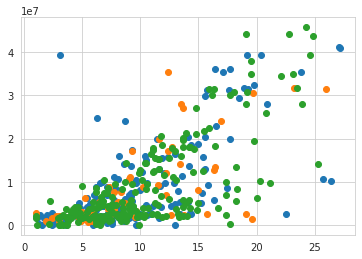

In [ ]:
### Complete in this cell:  Relationship between scoring and salary (in millions of dollars)
fig, ax = plt.subplots() 
for pos in working_df.POSITION.unique():
  marks = (working_df.POSITION == pos)
  X = working_df.loc[marks].PTS
  Y = working_df.loc[marks].SALARY
  ax.scatter(X, Y)
fig.show()

3- Now plot assists-vs-salary and rebounding-vs-salary

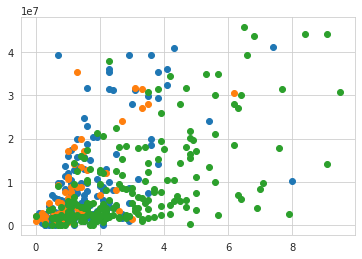

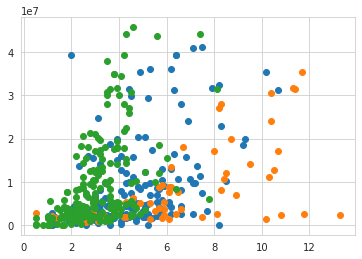

In [ ]:
### Complete in this cell: plot assist-vs-salary, rebounding-vs-salary
fig, ax = plt.subplots() 
for pos in working_df.POSITION.unique():
  marks = (working_df.POSITION == pos)
  X = working_df.loc[marks].AST
  Y = working_df.loc[marks].SALARY
  ax.scatter(X, Y)
fig.show()
fig, ax = plt.subplots() 
for pos in working_df.POSITION.unique():
  marks = (working_df.POSITION == pos)
  X = working_df.loc[marks].REB
  Y = working_df.loc[marks].SALARY
  ax.scatter(X, Y)
fig.show()

4- When NBA players enter the league, they have low value salaries during what is called their "rookie contract". This means that it doesn't matter how well the player performs, they can't have large salaries. This can distort our understanding of how much teams value each skill, as a player could score 50 points a game and still earn just a couple of millions. So, lets now plot points, assists and rebounding vs salary, but only for players that have more than 4 years of experience (the typical length of a rookie contract)

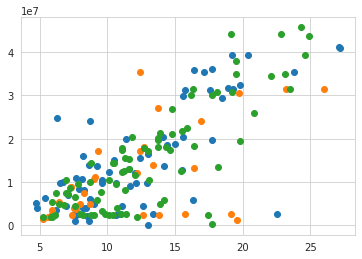

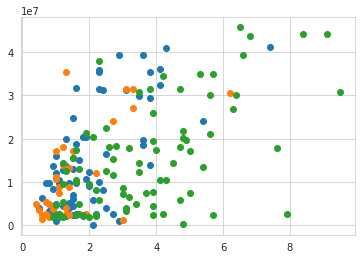

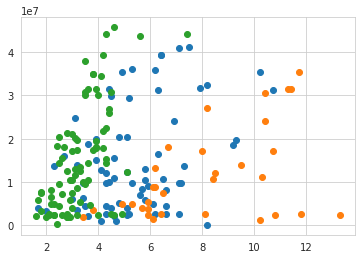

In [ ]:
### Complete in this cell: non rookie contracts
fig, ax = plt.subplots() 
for pos in working_df.POSITION.unique():
  marks = (working_df.POSITION == pos) & (working_df.SEASON_EXP >= 5)
  X = working_df.loc[marks].PTS
  Y = working_df.loc[marks].SALARY
  ax.scatter(X, Y)
fig.show()
fig, ax = plt.subplots() 
for pos in working_df.POSITION.unique():
  marks = (working_df.POSITION == pos) & (working_df.SEASON_EXP >= 5)
  X = working_df.loc[marks].AST
  Y = working_df.loc[marks].SALARY
  ax.scatter(X, Y)
fig.show()
fig, ax = plt.subplots() 
for pos in working_df.POSITION.unique():
  marks = (working_df.POSITION == pos) & (working_df.SEASON_EXP >= 5)
  X = working_df.loc[marks].REB
  Y = working_df.loc[marks].SALARY
  ax.scatter(X, Y)
fig.show()

5- Plot the scoring average grouped by position, we want to be able to see median, quartiles, etc 

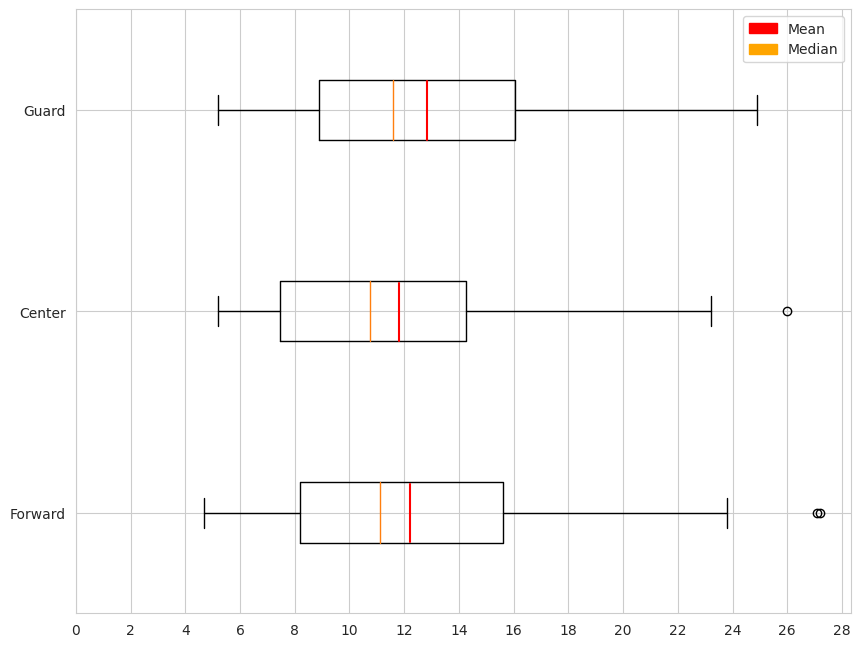

In [ ]:
### Complete in this cell: Scoring average grouped by position
fig, ax = plt.subplots()
fig.set_size_inches(7,5) 
marks1 = (working_df.POSITION == "Forward") & (working_df.SEASON_EXP >= 5)
marks2 = (working_df.POSITION == "Center") & (working_df.SEASON_EXP >= 5)
marks3 = (working_df.POSITION == "Guard") & (working_df.SEASON_EXP >= 5)
test_list = [working_df.loc[marks1].PTS, working_df.loc[marks2].PTS, working_df.loc[marks3].PTS]
X = np.array(test_list,dtype=object)
ax.boxplot(X, vert = False, labels=working_df.POSITION.unique())
leg = [mpatches.Patch(color='red', label='Mean'),mpatches.Patch(color='orange', label='Median')]
ax.legend(handles=leg)
plt.axvline(x = np.mean(working_df.loc[marks1].PTS), color = 'r', ymin=0.118, ymax=0.214)
plt.axvline(x = np.mean(working_df.loc[marks2].PTS), color = 'r', ymin=0.450, ymax=0.547)
plt.axvline(x = np.mean(working_df.loc[marks3].PTS), color = 'r', ymin=0.784, ymax=0.881)
plt.xticks(list(range(0,30,2)))
fig.set_size_inches(10, 8)
fig.set_dpi(100)
fig.show()

6- Plot the Height distribution of all players

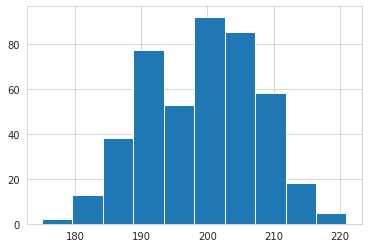

In [ ]:
### Complete in this cell: height distribution
fig, ax = plt.subplots()
x = working_df.HEIGHT
ax.hist(x, bins = 10)
plt.show()

OPTIONAL: Can you find a way to draw a world map and show how many active players per country the NBA has? [Example](https://i.redd.it/8qymui9fnin71.jpg)

In [ ]:
!git clone https://github.com/Gonzalez-Matias/Map_data

Cloning into 'Map_data'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 13 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (13/13), done.


In [ ]:
n_players = working_df.groupby("COUNTRY").count()[["PLAYER_NAME","POSITION"]]
world_data = gdp.read_file("Map_data/World_Map.shp")
world_data.replace({"United States":"USA","Democratic Republic of the Congo":"DRC","Congo":"Republic of the Congo"}, inplace=True)
combined = world_data.merge(n_players, left_on="NAME", right_on=n_players.index, how="left")
combined.fillna(int(0), inplace=True)
combined["cant"] = combined.apply(lambda x: 1 if x.POSITION==1 else ( 2 if (x.POSITION>1 and x.POSITION<=5) else ( 3 if (x.POSITION>5 and x.POSITION<=10) else (4 if (x.POSITION>10 and x.POSITION<=30) else (5 if x.POSITION>30 and x.POSITION<=300 else (6 if x.POSITION>300 else 0))))), axis=1)
combined["cant2"] = combined.apply(lambda x: "1" if x.POSITION==1 else ( "+1" if (x.POSITION>1 and x.POSITION<=5) else ( "+5" if (x.POSITION>5 and x.POSITION<=10) else ("+10" if (x.POSITION>10 and x.POSITION<=30) else ("+30" if x.POSITION>30 and x.POSITION<=300 else ("+300" if x.POSITION>300 else "0"))))), axis=1)

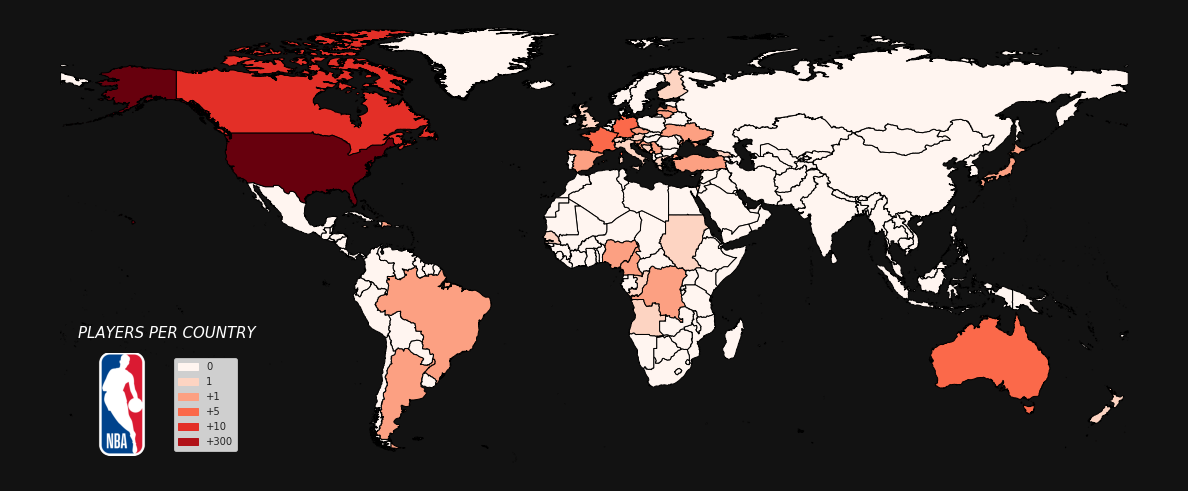

In [ ]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
im = plt.imread('Map_data/NBA-Logo.png')
fig, ax = plt.subplots(figsize = (17,15))
ax = combined.plot(edgecolor="black", cmap="Reds" , column = "cant", ax=ax)
ax.axis('off')
newax = fig.add_axes([0.05,0.25,0.15,0.15], anchor='NE', zorder=1)
newax.imshow(im)
newax.axis('off')
fig.set_tight_layout(False)
fig.patch.set_facecolor([0.07,0.07,0.07])
cmap = plt.cm.get_cmap('Reds')
leg = []
c = 0.0
it = 0
for gr in combined.cant.unique():
  div = 1.0/len(combined.cant.unique())
  leg.append(mpatches.Patch(color=list(cmap(c)[0:3]), label=combined.cant2.unique()[it]))
  it += 1
  c += div
ax.legend(handles=leg, bbox_to_anchor=(-0.3, -0.225, 0.5, 0.5))
plt.title("PLAYERS PER COUNTRY", color="white", fontsize=15, fontstyle='italic', position=(0.75,1.1))
plt.show()